Plots: PlanePlotter
===================

This example illustrates how to plot a `Plane` using a `PlanePlotter`.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


First, lets create a image-plane `Grid2D` and ray-trace it via `MassProfile` to create a source-plane `Grid2D`.

In [2]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

mass_profile = al.mp.EllIsothermal(
    centre=(0.0, 0.0), elliptical_comps=(0.1, 0.2), einstein_radius=1.0
)
deflections = mass_profile.deflections_2d_from_grid(grid=grid)
lens_galaxy = al.Galaxy(redshift=0.5, mass=mass_profile)

lensed_grid = grid.grid_from_deflection_grid(deflection_grid=deflections)

We create a `Plane` representing a source-plane containing a `Galaxy` with a `LightProfile`.

In [3]:
bulge = al.lp.EllSersic(
    centre=(0.1, 0.1),
    elliptical_comps=al.convert.elliptical_comps_from(axis_ratio=0.8, angle=60.0),
    intensity=0.3,
    effective_radius=1.0,
    sersic_index=2.5,
)

source_galaxy = al.Galaxy(redshift=1.0, bulge=bulge)

image_plane = al.Plane(galaxies=[lens_galaxy])
source_plane = al.Plane(galaxies=[source_galaxy])

We can plot the `image_plane` by passing it and our `grid to a` PlanePlotter` and calling various `figure_*` methods.

In this script our `lens_galaxy` only had a `MassProfile` so only methods like `figure_convergence` are
available.

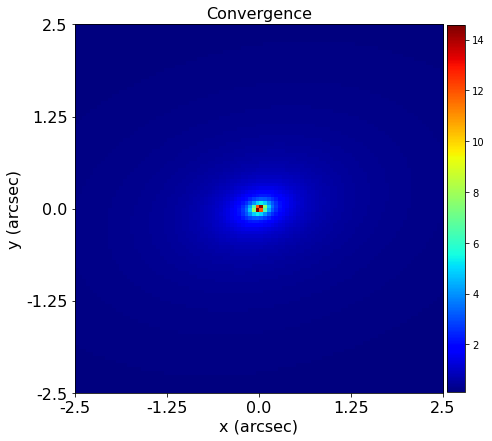

In [4]:
plane_plotter = aplt.PlanePlotter(plane=image_plane, grid=grid)
plane_plotter.figures_2d(convergence=True)

We can also plot the `source_plane` by passing it with the `lensed_grid` to a `PlanePlotter`.

In this case, our `source_galaxy` only had a ` LightProfile` so only a plot of its image is available.

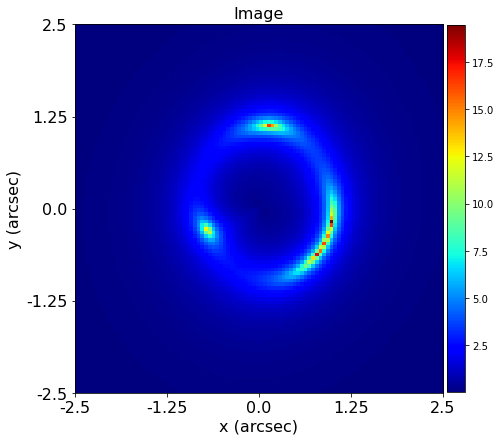

In [5]:
plane_plotter = aplt.PlanePlotter(plane=source_plane, grid=lensed_grid)
plane_plotter.figures_2d(image=True)

In addition to the lensed image of the source-plane, we can plot its unlensed image (e.g. how the source-galaxy 
appears in the source-plane before lensing) using the `figure_plane_image` method.

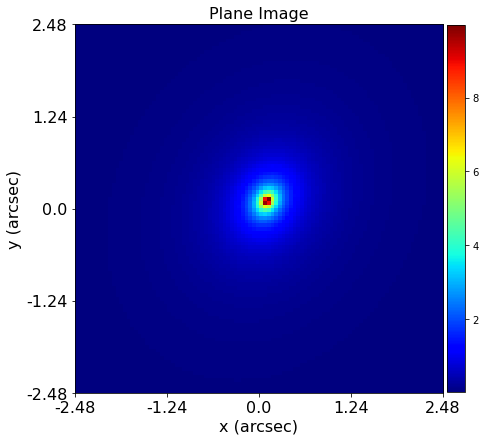

In [6]:
plane_plotter.figures_2d(plane_image=True)

It is feasible for us to plot the caustics in the source-plane. However, to calculate the `Caustics` we must manually
compute them from the image-plane `MassProfile` and pass them to the source-plane mat_plot_2d. 

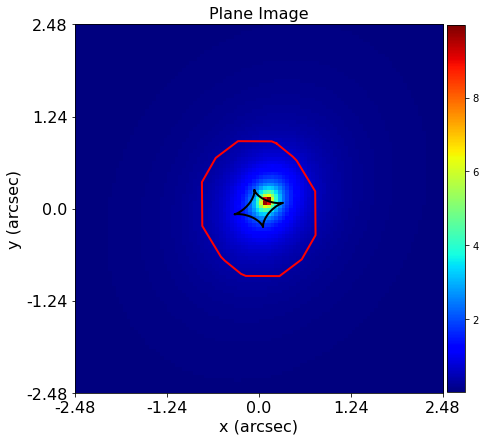

In [7]:
visuals_2d = aplt.Visuals2D(caustics=image_plane.caustics_from_grid(grid=grid))
plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=lensed_grid, visuals_2d=visuals_2d
)
plane_plotter.figures_2d(plane_image=True)

For `PlanePlotter`'s, `GalaxyPlotter`'s and `LightProfilePlotter's that are plotting source-plane images, the only
way to plot the caustics is to manually extract them from the foreground `MassProfile`'s, as shown above. This is 
because these source-plane objects have no knowledge of what objects are in the image-plane.

`TracerPlotter`'s automatically extract and plot caustics on source-plane figures, given they have available the 
necessary information on the image-plane mass. This is shown in `autolens_workspace/plot/plotters/TracerPlotter.py`.

A `Plane` and its `Grid2D` contains the following attributes which can be plotted automatically via 
the `Include2D` object.

(By default, a `Grid2D` does not contain a `Mask2D`, we therefore manually created a `Grid2D` with a mask to illustrate
plotting its mask and border below).

In [8]:
mask = al.Mask2D.circular(
    shape_native=grid.shape_native, pixel_scales=grid.pixel_scales, radius=2.0
)
masked_grid = al.Grid2D.from_mask(mask=mask)

include_2d = aplt.Include2D(
    origin=True,
    mask=True,
    border=True,
    light_profile_centres=True,
    mass_profile_centres=True,
    critical_curves=True,
)

Note that the image-plane has no `LightProfile`'s and does not plot any light-profile centres. Similarly, the 
source-plane has no `MassProfile`'s and plot no mass-profile centres.

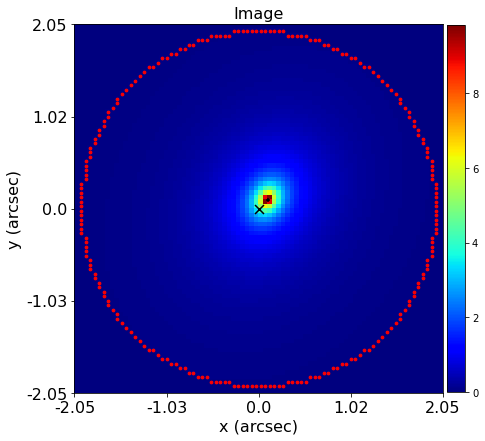

In [9]:
plane_plotter = aplt.PlanePlotter(
    plane=image_plane, grid=masked_grid, include_2d=include_2d
)
plane_plotter.figures_2d(image=True)
plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=masked_grid, include_2d=include_2d
)
plane_plotter.figures_2d(image=True)

Finish.